<a href="https://colab.research.google.com/github/UMassIonTrappers/quantum-computing-labs/blob/main/Lab_06_2_Qubit_gates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE 550/650 QC

## Introduction to Quantum Computing

Robert Niffenegger (rniffenegger@umass.edu )

#QuTiP

In [ ]:
try:
  import qutip
except ImportError:
  print('Install Qutip')
  !pip install --quiet qutip
  !pip install --quiet qutip-qip #New library from Qutip https://arxiv.org/pdf/2105.09902v2.pdf #

Install Qutip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.6/128.6 kB 2.0 MB/s eta 0:00:00


#Qiskit

IBM's Quantum Information Software Kit

In [ ]:
try:
  import qiskit
except ImportError:
  print('Install Qiskit')
  !pip install --quiet qiskit
  !pip install --quiet qiskit[visualization]
  !pip install --quiet git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
  !pip install --quiet qiskit-aer #Install Qiskit Aer so you can import QasmSimulator

Install Qiskit
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 68.7 MB/s eta 0:00:00


### Initialize

In [ ]:
%matplotlib inline
from IPython.display import display, Math
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sqrt, sin, cos

#Plot setup
from pylab import *
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

#QuTiP imports
import qutip as qt
from qutip import *

#QUTIP QIP
from qutip.qip import *
from qutip_qip.circuit import QubitCircuit
from qutip_qip.operations import Gate
from qutip_qip.qasm import circuit_to_qasm_str


#Qisket imports
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.visualization import *
from qiskit.quantum_info import Statevector, Operator
from qiskit.circuit.library import *
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import QasmSimulator, UnitarySimulator

'''
In Jupyter Notebooks we can display this nicely using Latex.
'''
from qiskit.visualization import array_to_latex

from scipy import constants

#Multi-Qubit Circuits


$|a\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix}
$

> Reference: https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html


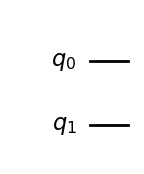

In [ ]:
#Set simulator to evolve state

QasmSim = QasmSimulator() #Set simulator to evolve state

# Create a Quantum Circuit acting on the q register
qc = QuantumCircuit(2)

# Not Gate on qubit 1 ('X' pi rotation)
# qc.x(0)

# Control Not -
# qc.cx(0,1)

# Draw the circuit
qc.draw('mpl')


What is the initial state of this qubit register?

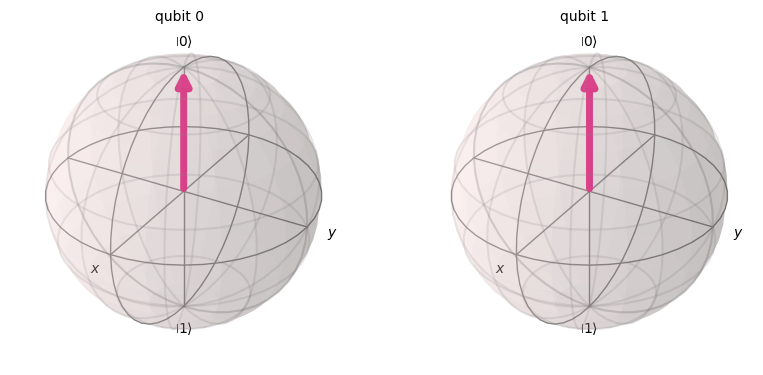

In [ ]:
qc = QuantumCircuit(2)# Create a Quantum Circuit acting on the q register

# Ask for the state vector of the circuit
qc.save_statevector()

job = QasmSim.run(qc, shots=100)
result = job.result()

final_state = result.get_statevector()

plot_bloch_multivector(final_state)

In [ ]:
# Print the statevector neatly:
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

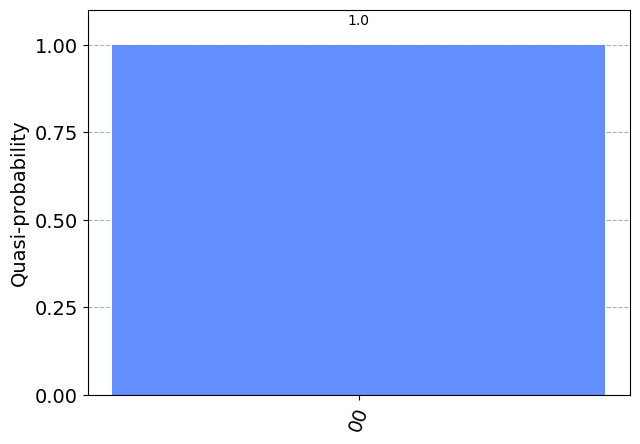

In [ ]:
plot_histogram(result.get_counts())

Therefore initial state is both qubits in 0 (i.e. $|00\rangle$)



$|a\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix}
$

$a_{00}=1$

>Convention is to always start in the 'zero' register

It is also possible to represent the initial state in the full 'density' matrix form.

$ Ψ = Ψ_1 ⊗ Ψ_2 =
\begin{bmatrix} 1 \times \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix}
              & 0 \times \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix}
                \\
                0 \times \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix}
              & 0 \times \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix}
\end{bmatrix}
=
\begin{bmatrix}  
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}
$

#Controlled NOT

The Controlled NOT (Controlled X) is a fundamental two qubit logical operation.


<!-- ![https://upload.wikimedia.org/wikipedia/en/thumb/5/58/Cnot-compared-to-xor.svg/1200px-Cnot-compared-to-xor.svg.png](https://upload.wikimedia.org/wikipedia/en/thumb/5/58/Cnot-compared-to-xor.svg/1200px-Cnot-compared-to-xor.svg.png) -->


To implement it with qubits we will need to have a coherent interaction of their states. This interaction will rely on an entanglement between the two qubits and then single qubit rotations to create the desired logical truth table.

##The CNOT Gate is equivalent to the CXGATE ('Control X Gate')
Further there are the complementary gates:  CYGATE and CZGATE

\begin{split}CX\ q_1, q_0 =
    |0 \rangle\langle 0| \otimes I + |1 \rangle\langle 1| \otimes X =
    \begin{pmatrix}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 0 & 1 \\
        0 & 0 & 1 & 0
    \end{pmatrix}\end{split}

(<Figure size 640x480 with 2 Axes>, <Axes: >)

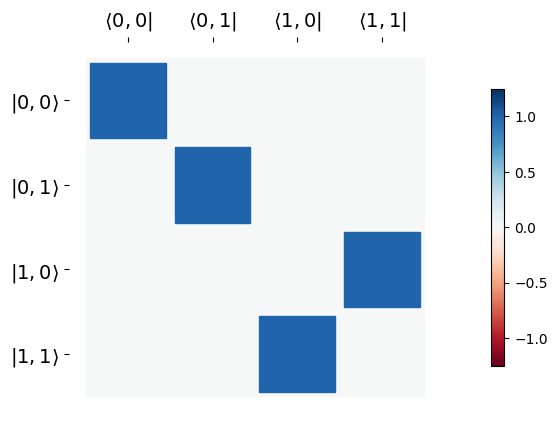

In [ ]:
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit
''' QUTIP Hinton PLOT'''

hinton(cnot(control=0, target=1))

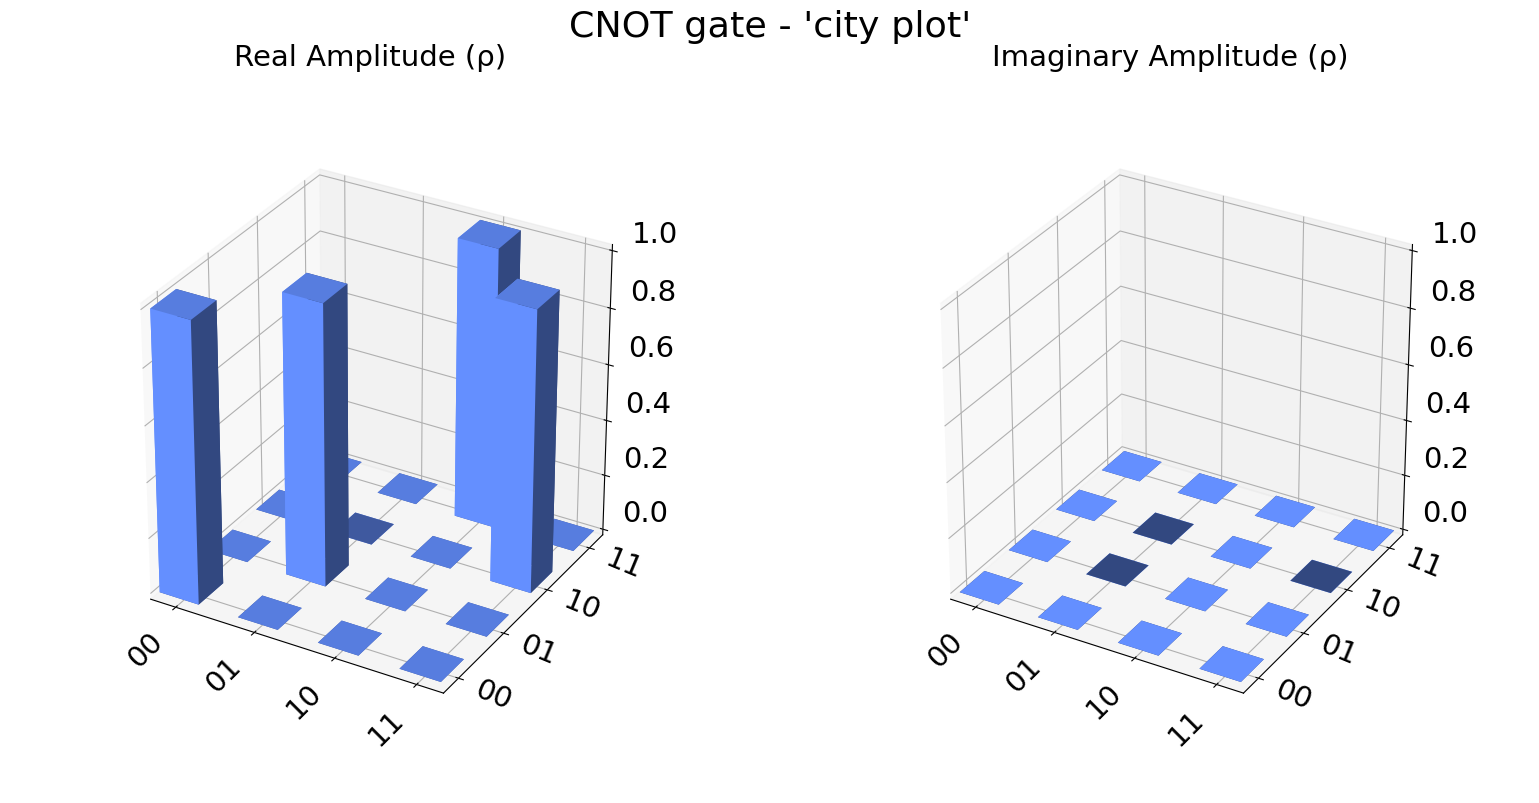

In [ ]:
''' QISKIT HINTON PLOT'''

from qiskit.visualization import plot_state_city
qc = QuantumCircuit(2)
qc.cx(1,0)
U = Operator(qc)

plot_state_city(U.to_matrix(), title="CNOT gate - 'city plot'")

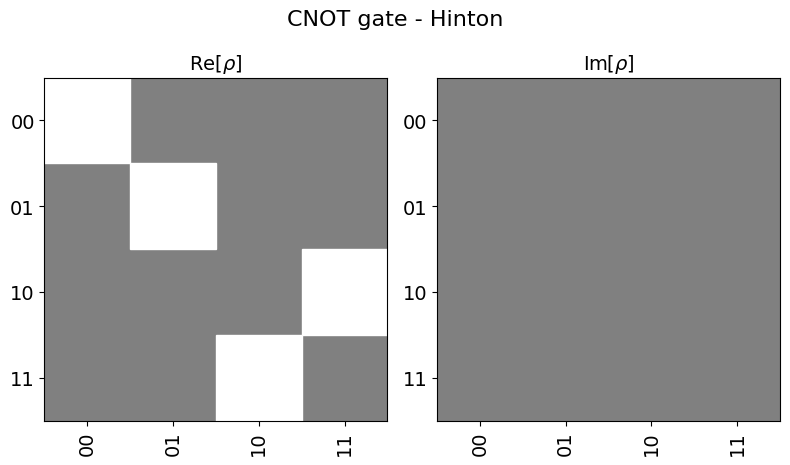

In [ ]:
from qiskit.visualization import plot_state_city
qc = QuantumCircuit(2)
qc.cx(1,0)
U = Operator(qc)

plot_state_hinton(U.to_matrix(), title="CNOT gate - Hinton")

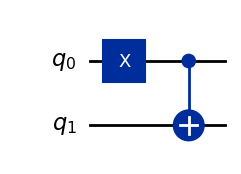

In [ ]:
# Create a Quantum Circuit acting on the q register
qc = QuantumCircuit(2)

# NOT Gate on qubit 1, i.e. pi rotation about 'X' of qubit 1
qc.x(0)

# Control Not (control qubit , target qubit (to flip based on control qubit state))
qc.cx(0,1)

# Draw the circuit
qc.draw('mpl')


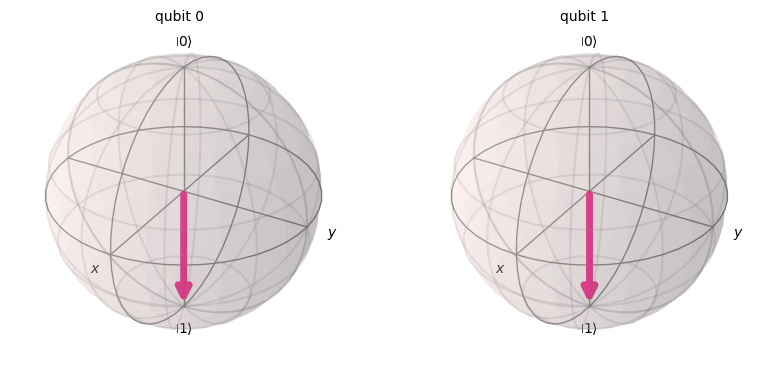

In [ ]:
''' Initial state '''
qc1 = QuantumCircuit(2)
qc1.save_statevector()

job = QasmSim.run(qc1, shots=100)
result1 = job.result()

initial_state = result1.get_statevector()


'''Full circuit and final state'''
qc = QuantumCircuit(2)# Create a Quantum Circuit acting on the q register

qc.x(0)# NOT Gate on qubit 1, i.e. pi rotation about 'X' of qubit 1
qc.cx(0,1)# Control Not (control qubit , target qubit (to flip based on control qubit state))

# Ask for the state vector of the circuit
qc.save_statevector()

# result = execute(qc, backend = sim).result()
job = QasmSim.run(qc, shots=100)
result = job.result()


# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

plot_bloch_multivector(final_state)

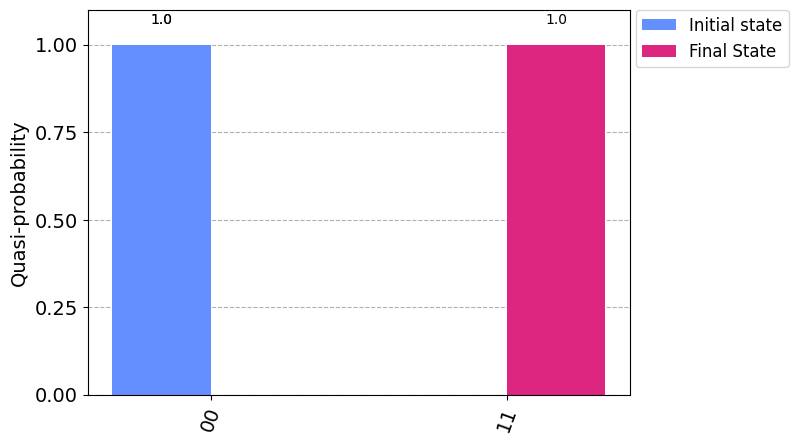

In [ ]:
# Plot results with legend
legend = ['Initial state', 'Final State']
plot_histogram([result1.get_counts(), result.get_counts()], legend=legend)

In [ ]:
array_to_latex(final_state, prefix="\\text{2 Qubit State vector, } \Psi = ")


<IPython.core.display.Latex object>

Therefore final state is both qubits in 1 (i.e. $|11\rangle$)



$|a\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix}
$

$a_{11}=1$

We started by:
 1. Flipping the 1st qubit with the x gate
 1. Flipping the 2nd qubit based on the state of the 1st qubit

Therefore both qubits were flipped by the circuit!

What is the matrix representation of that?

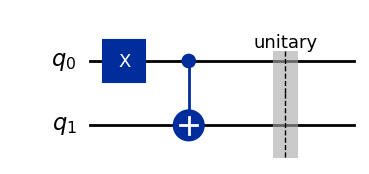

In [ ]:
qr = QuantumRegister(2,'q')

qc = QuantumCircuit(qr)

qc.x(qr[0])
qc.cx(0,1)

qc.save_unitary()

# Draw the circuit
qc.draw('mpl')

In [ ]:
job = QasmSim.run(qc, shots=100)
result = job.result()

# Display the results:
array_to_latex(result.get_unitary(), prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

Therefore if our initial state was $|00⟩$ then multiplying it by this circuit will yield $|11⟩$

$ \begin{bmatrix}
0 & 1 & 0 & 0  \\
 0 & 0 & 1 & 0  \\
 0 & 0 & 0 & 1  \\
 1 & 0 & 0 & 0  \\
 \end{bmatrix}
 \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}
 =
  \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}$



# Superposition + Controlled NOT

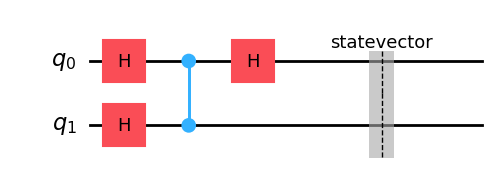

In [ ]:
# Create a Quantum Circuit acting on the q register
qc = QuantumCircuit(2)

# Hadamard Gate on qubit 1
qc.h(0)

qc.h(1)

qc.cz(0,1)# Control Not (control qubit , target qubit (to flip based on control qubit state))

qc.h(0)

# Ask for the state vector of the circuit
qc.save_statevector()


# Draw the circuit
qc.draw('mpl')

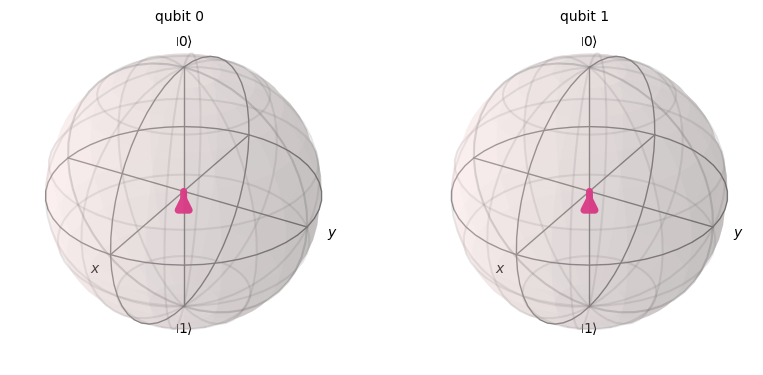

In [ ]:
# qc = QuantumCircuit(2) # Create a Quantum Circuit acting on the q register
# qc.h(0)  # Hadamard Gate on qubit 1
# qc.h(1)

# qc.cz(0,1)# Control Not (control qubit , target qubit (to flip based on control qubit state))
# qc.h(0)
# # Ask for the state vector of the circuit
# qc.save_statevector()

result = QasmSim.run(qc).result()

final_state = result.get_statevector()

plot_bloch_multivector(final_state)

In [ ]:
# Print the statevector neatly:
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

Now that we have prepared our control qubit into a superposition we now get a superposition on the output of the control not, a superposition of the two previous circuits with the first qubit zero and the first qubit 1.

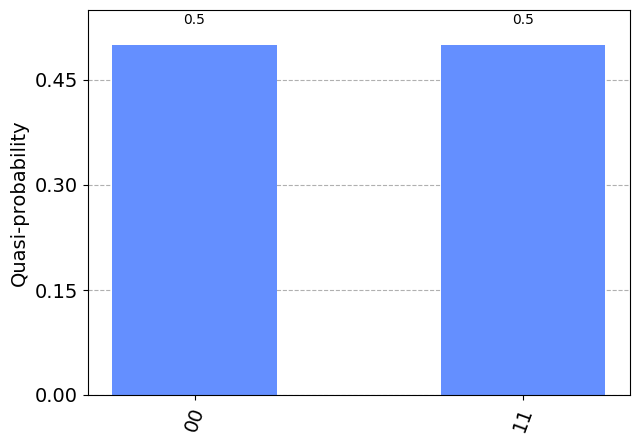

In [ ]:
plot_histogram(result.get_counts())

This is an entangled state, $|\Phi^+ ⟩$.


This shows how critical entanglement is to the logical operation of multiple qubits and why it is needed for multiple qubit logic.

Any physical implementation of a logical CNOT gate requires qubit entanglement.

The Bell Basis states:

$
 |\Psi^- ⟩ = \frac{1}{\sqrt{2}}(|01⟩ - |10⟩) \\
 |\Psi^+ ⟩ = \frac{1}{\sqrt{2}}(|01⟩ + |10⟩) \\
 |\Phi^- ⟩ = \frac{1}{\sqrt{2}}(|00⟩ - |11⟩) \\
 |\Phi^+ ⟩ = \frac{1}{\sqrt{2}}(|00⟩ + |11⟩)
$

# Controlled Phase gate

One way to construct a CNOT gate is to use a controlled phase gate.

In a control phase gate, the state of qubit one affects the energy of qubit 2.

This difference in energy creates a phase difference between the two qubits.

### $Δ ϕ = \frac{(E_1 - E_2)*t}{ħ}$ (but conditional on qubit 1's state)

If after a certain period of time a phase of $e^{iπ}=-1$ is acquired that is equivalent to having flipped that qubit twice.

Therefore, with appropriate single qubit gates the phase flip can be mapped back to a state flip.

Below we see that a Hadamard gate (converting to the +X basis state) before and after the Control-Phase gate is enough.

This is because converting from the Z basis to the X basis means that a phase flip (rotation about Z) is a flip in the X basis.

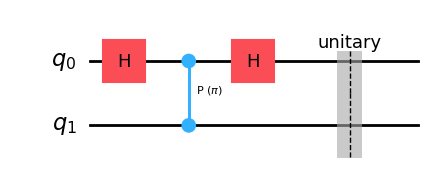

In [ ]:
# Create a Quantum Circuit acting on the q register
qc = QuantumCircuit(2)

# Hadamard Gate on qubit 1
qc.h(0)

'''
To add gates from the 'circuit library' they must be appended
'''
qc.append(CPhaseGate(theta=pi), [0, 1])

qc.h(0)

# Simulate the unitary
qc.save_unitary()

# Draw the circuit
qc.draw('mpl')

In [ ]:

unitary = QasmSim.run(qc).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

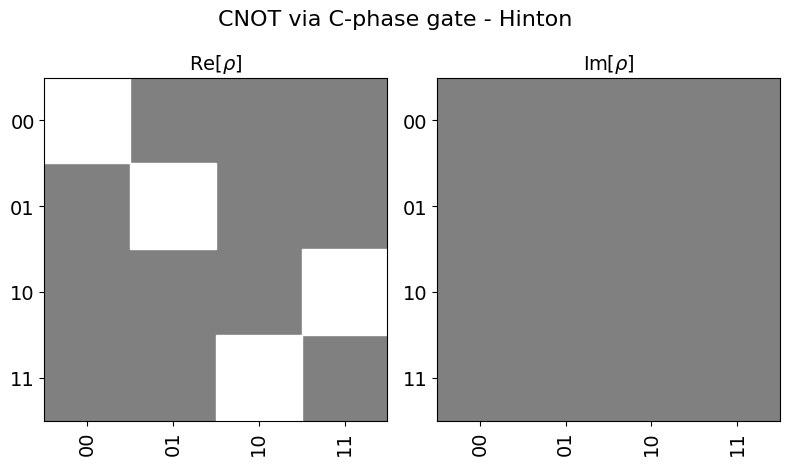

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.append(CPhaseGate(theta=pi), [0, 1])
qc.h(0)
U = Operator(qc)

plot_state_hinton(U.to_matrix(), title="CNOT via C-phase gate - Hinton")

# XX interaction
(aka Ising, aka Molmer Sorenson)

Another way to construct a CNOT gate is with an XX interaction.

This has a few different names, including an Ising interaction and the Molmer Sorenson interaction.

## $\displaystyle{ H(t) = \hbar\Omega(e^{-i\delta t}+e^{i\delta t})e^{i\eta(\hat ae^{-i\nu t}+\hat a^\dagger e^{i\nu t})}(\hat \sigma^{(1)}_{+}+\hat \sigma^{(2)}_{+}) + h.c.  }$

  * $Ω$ = Rabi coupling rate of |e> to |g>
  * $δ$ = Detuning of laser from optical resonance
  * $η$ = 'Lamb-Dicke' parameter (motional coupling)
  * $\hat a$ = Harmonic Oscillator excitation operator (n=0→n=1)
  * $ν$ = Harmonic Oscillator frequency detuning (Energy = $ħν$)
  * $σ_{+}$ = Electronic excitation operator (g→e)

For ions (spins in a chain) the qubit state is the atomic electronic state of the ion but the two ions interact via the common harmonic trap and their mutual Coulomb repulsion within it.

Here the lasers applied don't just couple to the electronic states they also add kinetic energy to the ion's motion within the Harmonic oscillator.

Therefore, the Harmonic oscillator states are almost excited by the gate and residual motion is a main source of error.



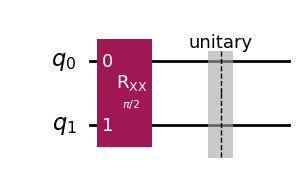

In [ ]:
from qiskit.circuit.library import *

# Create a Quantum Circuit acting on the q register
qc = QuantumCircuit(2)

# TWO QUBIT GATE
qc.append(RXXGate(theta=pi/2), [0, 1])

# Simulate the unitary
qc.save_unitary()

# Draw the circuit
qc.draw('mpl')

In [ ]:
qc = QuantumCircuit(2)
qc.append(RXXGate(theta=pi/2), [0, 1])

# Simulate the unitary
qc.save_unitary()

unitary = QasmSim.run(qc).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

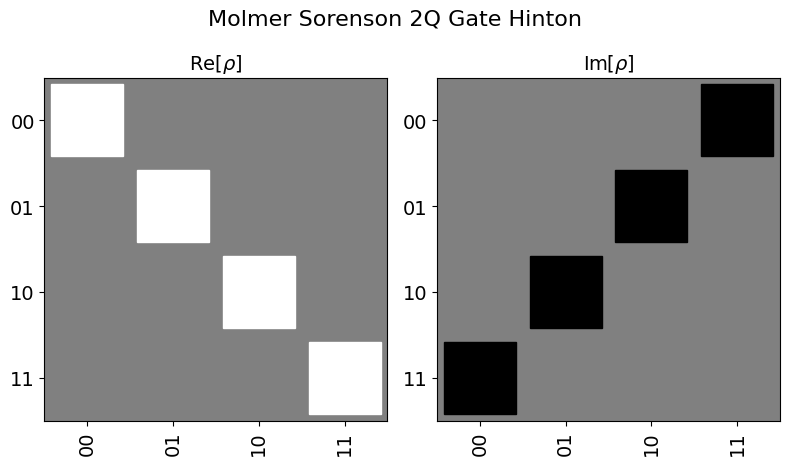

In [ ]:
qc = QuantumCircuit(2)
qc.append(RXXGate(theta=pi/2), [0, 1])

U = Operator(qc)

plot_state_hinton(U.to_matrix(), title="Molmer Sorenson 2Q Gate Hinton")

##This doesn't look like the CNOT

However, if we add a few single qubit rotations we get the CNOT gate.

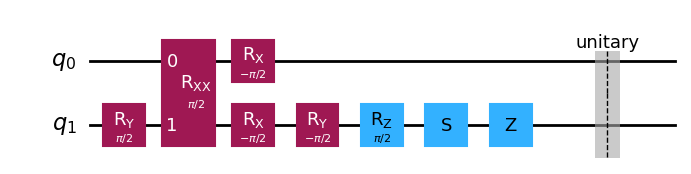

In [ ]:
from qiskit.circuit.library import *

# Create a Quantum Circuit acting on the q register
qc = QuantumCircuit(2)

qc.append(RYGate(theta=pi/2), [1])

# TWO QUBIT GATE
qc.append(RXXGate(theta=pi/2), [0, 1])

qc.append(RXGate(theta=-pi/2), [0])

qc.append(RXGate(theta=-pi/2), [1])

qc.append(RYGate(theta=-pi/2), [1])

# Rotating the global phase to make the matrix look nice
qc.append(RZGate(phi=+1/2*pi), [1])
qc.s(1)
qc.z(1)

# Simulate the unitary
qc.save_unitary()

# Draw the circuit
qc.draw('mpl')

In [ ]:

unitary = QasmSim.run(qc).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

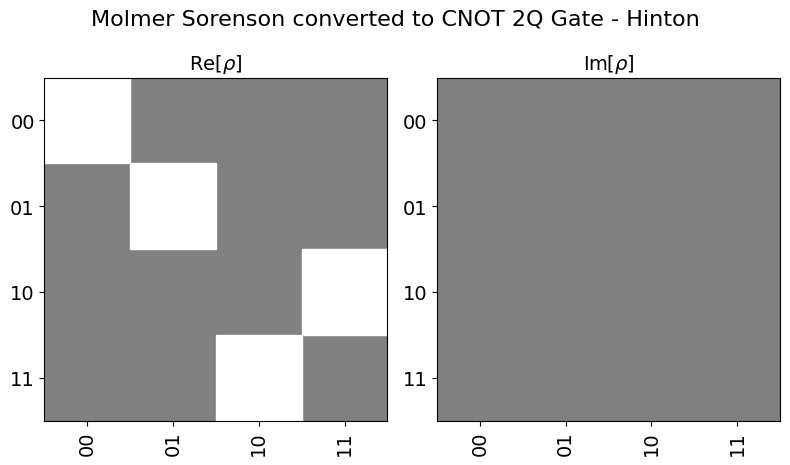

In [ ]:
qc = QuantumCircuit(2)
qc.append(RYGate(theta=pi/2), [1])
qc.append(RXXGate(theta=pi/2), [0, 1])
qc.append(RXGate(theta=-pi/2), [0])
qc.append(RXGate(theta=-pi/2), [1])
qc.append(RYGate(theta=-pi/2), [1])

qc.append(RZGate(phi=+1/2*pi), [1]) # Rotating the global phase to make the matrix look nice
qc.s(1)
qc.z(1)

U = Operator(qc)

plot_state_hinton(U.to_matrix(), title="Molmer Sorenson converted to CNOT 2Q Gate - Hinton")

(<Figure size 640x480 with 2 Axes>, <Axes: >)

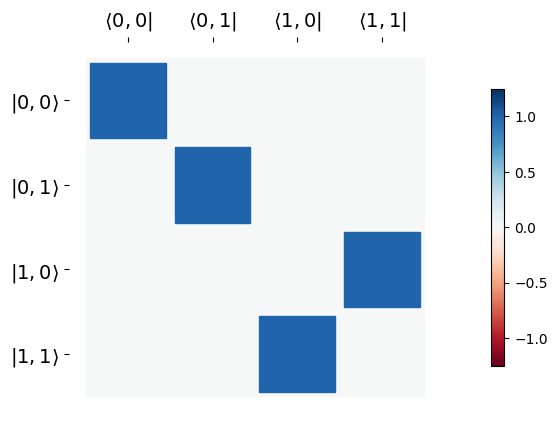

In [ ]:
hinton(cnot(control=0, target=1))

# Two Qubit MS Gate Hamiltonian

To implement the MS gate:

<!-- ![https://wikimedia.org/api/rest_v1/media/math/render/svg/2bb1b0b58570875b61aaa215349991b0b60e05d8](https://wikimedia.org/api/rest_v1/media/math/render/svg/2bb1b0b58570875b61aaa215349991b0b60e05d8)
 -->


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import qutip as qt
from qutip import qeye, tensor, destroy, fock_dm
from qutip import *
from qutip.qip import *

import numpy as np
from numpy import pi, sqrt, sin, cos


nq = 2      # spin states
nHO= 7     # H.O. states
nbar = 0    # mean occupation of thermal state

#Parameters
Omega = 2*pi/(3*2*1e-6)     #Rabi freq from pi time
eta = 0.06                  #Lamb Dicke factor for trap 1.44MHz 674nm

'''
Calculate the ideal detuning
'''
delta = 2*Omega*eta+2*pi*0  #assume ideal detuning

delta_asym = -2*pi*0        #assume ideal asymmetric detuning

'''
Calculate the ideal 2Q gate time
'''
time_end = 1/(delta/2/pi)   #assume ideal gate time

#initial state
e = fock_dm(nq,0) #excited state
g = fock_dm(nq,1) #ground state
psi0 = tensor(g, g, qt.thermal_dm(nHO,nbar))


#2 qubit states
ee=tensor(e,e,qeye(nHO))
eg=tensor(e,g,qeye(nHO))
ge=tensor(g,e,qeye(nHO))
gg=tensor(g,g,qeye(nHO))

#Annihilation tensor operators for ions and H.O.
a1     = tensor(destroy(nq), qeye(nq), qeye(nHO))
a2     = tensor(qeye(nq), destroy(nq), qeye(nHO))
aHO    = tensor(qeye(nq), qeye(nq), destroy(nHO))


t=np.linspace(0,time_end*4,200)

#Time dependent Hamiltionians (detuning phases)
def Hdelta_plus(t, args):
    return np.exp(1j*(delta+delta_asym)*t)/2
def Hdelta_minus(t, args):
    return np.exp(-1j*(delta+delta_asym)*t)/2
def Hdelta_plus2(t, args):
    return np.exp(1j*(delta-delta_asym)*t)/2
def Hdelta_minus2(t, args):
    return np.exp(-1j*(delta-delta_asym)*t)/2

'''
Interation Hamiltonian
'''
H=[[Omega*eta *a1.dag() *aHO.dag(),Hdelta_minus],[Omega*eta *a1 *aHO,Hdelta_plus],
   [Omega*eta *a1.dag() *aHO,Hdelta_plus],[Omega*eta *a1 *aHO.dag(),Hdelta_minus],
   [Omega*eta *a2.dag() *aHO.dag(),Hdelta_minus2],[Omega*eta *a2 *aHO,Hdelta_plus2],
   [Omega*eta *a2.dag() *aHO,Hdelta_plus2],[Omega*eta *a2 *aHO.dag(),Hdelta_minus2]]

# decay operators
c_ops = []

expt_ops = [ gg, ee ]


In [ ]:
# H

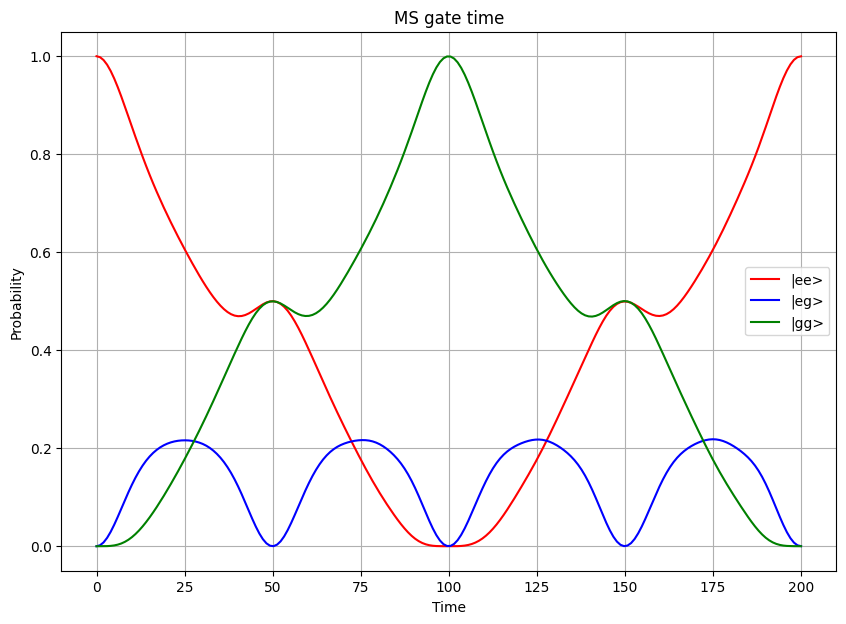

In [ ]:
#Run the simulation
output=qt.mesolve(H, psi0, t, c_ops , expt_ops)

#Save expectation values
pop_ee = output.expect[0]
pop_gg = output.expect[1]
pop_eg = 1-pop_ee-pop_gg

#Plot results
fsize = 10
plt.figure(figsize=(fsize,fsize*0.7))
plt.xlabel('Time')
plt.ylabel('Probability')
plt.grid(True)
plt.title('MS gate time')
plt.plot(t*1e6,pop_ee,'r' ,label='|ee>')
plt.plot(t*1e6,pop_eg,'b' ,label='|eg>')
plt.plot(t*1e6,pop_gg,'g' ,label='|gg>')
plt.legend()


However, we only want a pi/2 rotation in XX

Shorten the pulse.

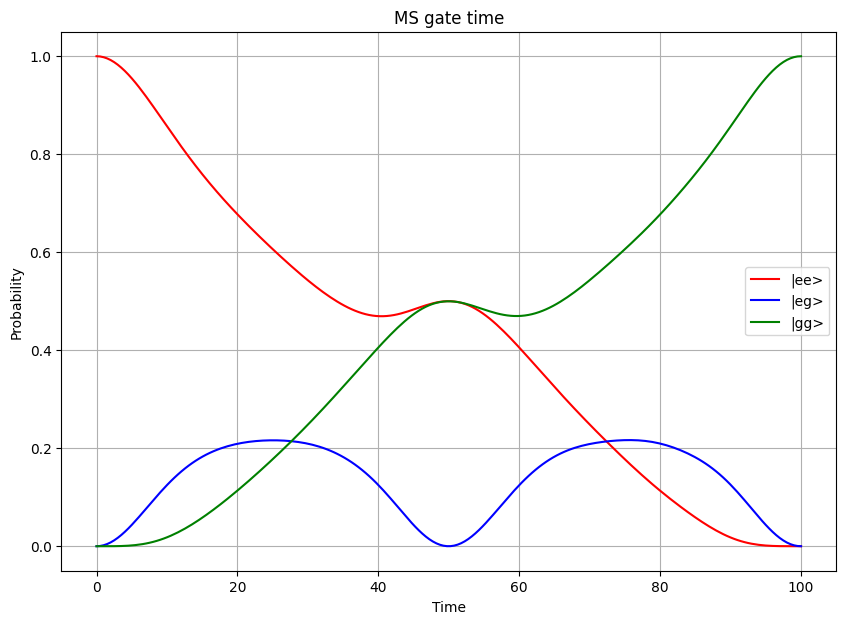

In [ ]:

# Shorter pulse for the entanglement
t=np.linspace(0,time_end*2,200)

#Run the simulation
output=qt.mesolve(H, psi0, t, c_ops , expt_ops)

#Save expectation values
pop_ee = output.expect[0]
pop_gg = output.expect[1]
pop_eg = 1-pop_ee-pop_gg

#Plot results
fsize = 10
plt.figure(figsize=(fsize,fsize*0.7))
plt.xlabel('Time')
plt.ylabel('Probability')
plt.grid(True)
plt.title('MS gate time')
plt.plot(t*1e6,pop_ee,'r' ,label='|ee>')
plt.plot(t*1e6,pop_eg,'b' ,label='|eg>')
plt.plot(t*1e6,pop_gg,'g' ,label='|gg>')
plt.legend()


##Initial State

The initial state of the gate above has both ions in the electronic ground state |gg> and the ground state of the harmonic oscillator |n=0>

The full Hilbert space looks very big because of the many Harmonic oscillator states. This is like modeling a pendulum with only a discrete angles of oscillation. You want many to acount for the swinging but only as many as you need given you're going to be only slightly perturbing the pendulum (harmonic oscillator).

For this simulation we've restricted to the lowest 7 levels of the Harmonic Oscillator.

So the Full Hilbert space is 7x7 just for the Harmonic oscillator (motion) and then 2x2 for each electronic state of each qubit.

That means the Full Hilbert space blows up to 7x7 , 2x2 , 2x2

This is also equivalent to the 2 qubit basis 2x2

(<Figure size 640x480 with 2 Axes>, <Axes: >)

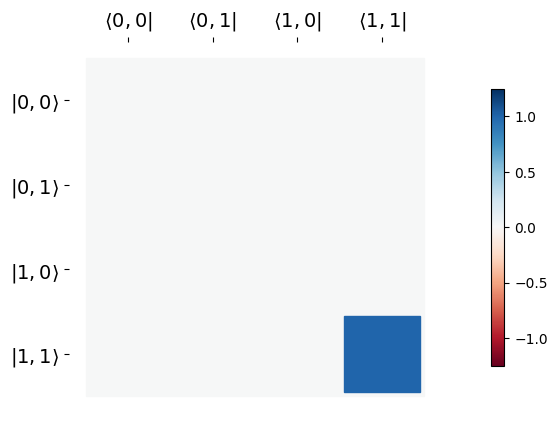

In [ ]:
'''
Initial qubit electronic states
'''
e = fock_dm(2,0) #Excited state (Density Matrix form)
g = fock_dm(2,1) #Ground state (Density Matrix form)

qubit1_i = g
qubit2_i = g

'''
Tensor Product of qubit one, qubit two and shared Harmonic Oscillator states
'''
# psi0 = tensor(qubit1_i, qubit2_i, thermal_initial_state)
psi0 = tensor(g, g)
'''
Plot the Full Hilbert space
'''
hinton(psi0)

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

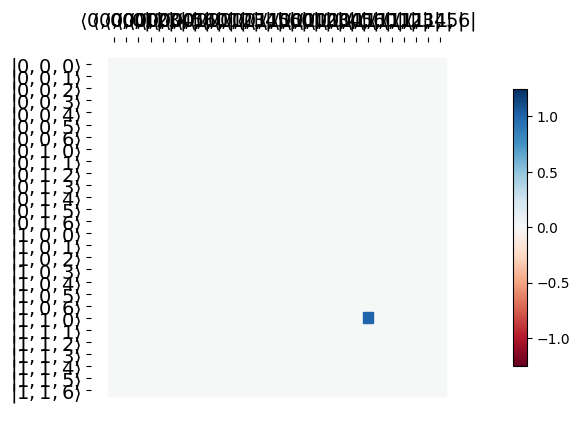

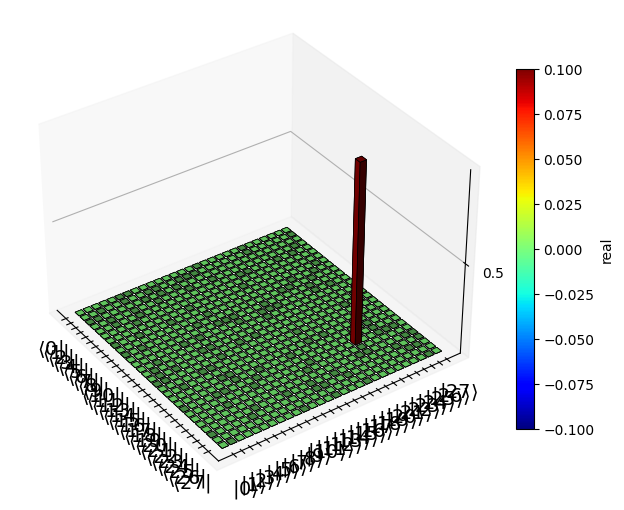

In [ ]:
'''
Initial qubit electronic states
'''
e = fock_dm(2,0) #Excited state (Density Matrix form)
g = fock_dm(2,1) #Ground state (Density Matrix form)

qubit1_i = g
qubit2_i = g

'''
Harmonic Oscillator
'''
nHO = 7 # number of levels
thermal_initial_state = qt.thermal_dm(nHO,nbar)

'''
Tensor Product of qubit one, qubit two and shared Harmonic Oscillator states
'''
# psi0 = tensor(qubit1_i, qubit2_i, thermal_initial_state)
psi0 = tensor(g, g, qt.thermal_dm(nHO,nbar))
'''
Plot the Full Hilbert space
'''
hinton(psi0)
matrix_histogram(psi0)

It is possible to go back to a smaller matrix by 'partially tracing' the matrix. As an example we can remove the Harmonic oscillator levels from the full matrix and go back to just the two qubit electronic states.

(<Figure size 640x480 with 2 Axes>, <Axes: >)

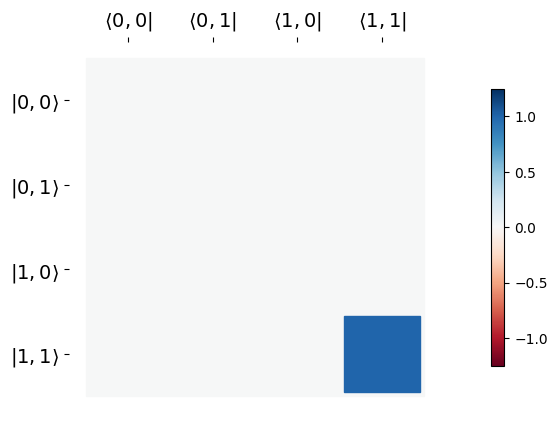

In [ ]:
psi0_0 = psi0.ptrace(0) # Partial trace of first qubit state
psi0_1 = psi0.ptrace(1) # Partial trace of second qubit state

psi_01 = psi0.ptrace([0,1]) # Partial trace of both the first and second qubit

hinton(psi_01) # Hinton Graph of the 2 qubit state

In [ ]:
# Shorter pulse for the entanglement
t=np.linspace(0,time_end*1,10)

psi0 = tensor(g, g,qt.thermal_dm(nHO,nbar))

c_ops = []

#run the simulation
output=qt.mesolve(H,psi0,t,c_ops)

In [ ]:
%matplotlib notebook

In [ ]:
from qutip import *

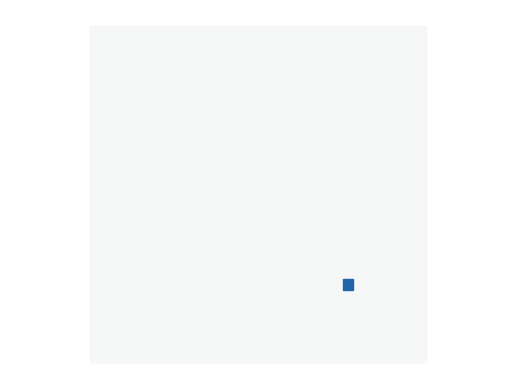

In [ ]:
from matplotlib.animation import FuncAnimation

# Animate
# M= output.states[0].full()
# n = np.size(M)
# xpos, ypos = np.meshgrid(range(M.shape[0]), range(M.shape[1]))
# xpos = xpos.T.flatten() - 0.5
# ypos = ypos.T.flatten() - 0.5
# zpos = np.zeros(n)
# dx = dy = 0.8 * np.ones(n)
# Mvec = M.flatten()
# dz = abs(Mvec)

# cmap = complex_phase_cmap()
# colors = cmap(norm(angle(Mvec)))

fig = plt.figure()
# ax = fig.add_subplot(111, projection="3d", azim=-40, elev=30)
ax = fig.add_subplot()
# ax.set_position([0, 0, 0.95, 1])

# ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors)

def animate(i):
    cla()
    hinton(output.states[i].full(), fig=fig, ax=ax, colorbar=False)
    return ax

def init():
    hinton(output.states[0].full(),fig=fig, ax=ax, colorbar=False)
    return ax

ani = FuncAnimation(fig, animate, np.arange(int(len(t)/1)),init_func=init,
                              blit=False, repeat=True)
#ani.save('MS_test.mp4', fps=20)
HTML(ani.to_jshtml())

(<Figure size 640x480 with 2 Axes>, <Axes: >)

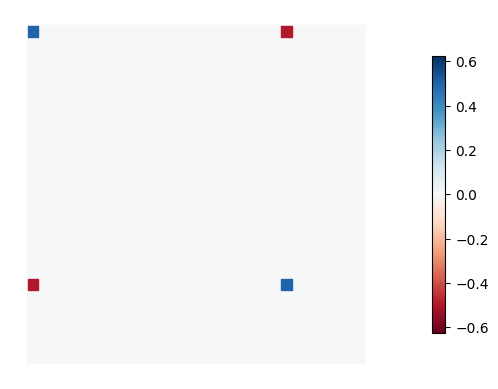

In [ ]:
hinton(output.states[-1].full())

In [ ]:
output.states[-1].overlap(gg)

0.5001336256278571

(<Figure size 640x480 with 2 Axes>, <Axes: >)

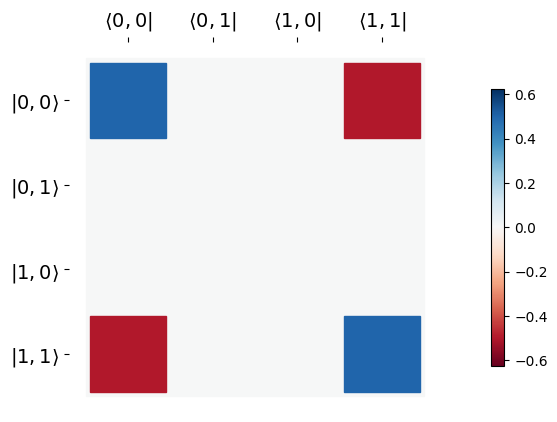

In [ ]:
'''
Extract the electronic states from the Thermal states by using partial traces.

1st extracts the electronic state of qubit 1
2nd extracts the electronic state of qubit 2

'''

psi_f_0 = output.states[-1].ptrace(0)
psi_f_1 = output.states[-1].ptrace(1)

'''
Extract the electronic states of qubit 1 and qubit 2 together
'''
psi_f = output.states[-1].ptrace([0,1])

# print(psi_f)

# matrix_histogram_complex(psi_f.full())

hinton(psi_f)

In [ ]:
# entropy_linear(output.states[-1])

# Spin decoherence

The coherence of the spin states coupled by the MS gate will reduce the fidelity of the gate.
To introduce them we will add 'collapse' operators to the integration of the Schrodinger equation which will add a dephasing rate.

    #spin coherence time
    tau_spin = 2.5e-3
    if tau_spin is not 0:
        c_ops.append(sqrt(1/tau_spin)*tensor(sz,qeye(nq),qeye(nHO)))
        c_ops.append(sqrt(1/tau_spin)*tensor(qeye(nq),sz,qeye(nHO)))


<>:10: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:10: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-108-28713aacc23f>:10: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if tau_spin is not 0:


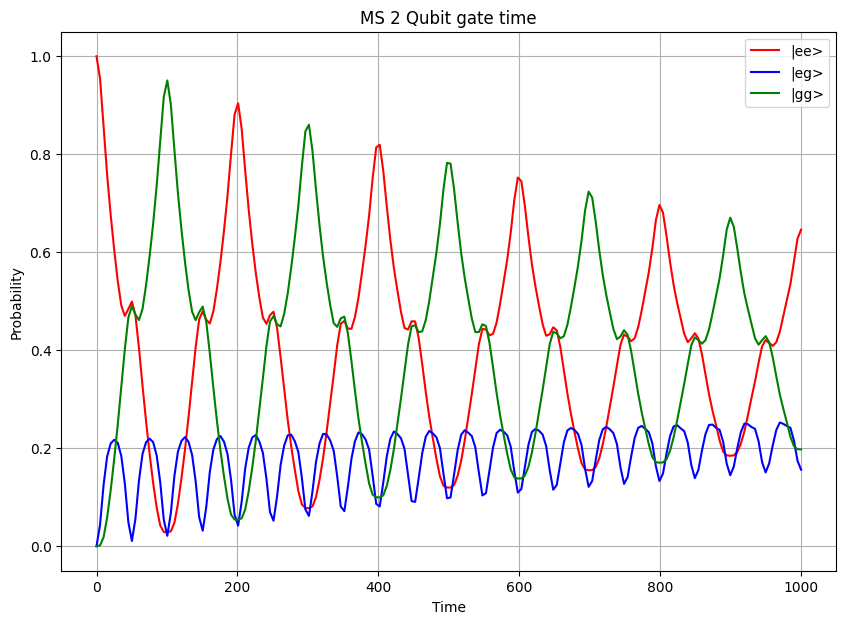

In [ ]:
sz = e - g

#Clear the prior collapse operators
c_ops = []

'''
Set the spin coherence time 2.5ms
'''
tau_spin = .0025 #seconds
if tau_spin is not 0:
    c_ops.append(sqrt(1/tau_spin)*tensor(sz,qeye(nq),qeye(nHO)))
    c_ops.append(sqrt(1/tau_spin)*tensor(qeye(nq),sz,qeye(nHO)))

t=np.linspace(0,time_end*20,200)

#Run the simulation
output=qt.mesolve(H,psi0,t,c_ops , expt_ops)

#Save expectation values
pop_ee = output.expect[0]
pop_gg = output.expect[1]
pop_eg = 1-pop_ee-pop_gg

#Plot results
fsize = 10
plt.figure(figsize=(fsize,fsize*0.7))
plt.xlabel('Time')
plt.ylabel('Probability')
plt.grid(True)
plt.title('MS 2 Qubit gate time')
plt.plot(t*1e6,pop_ee,'r' ,label='|ee>')
plt.plot(t*1e6,pop_eg,'b' ,label='|eg>')
plt.plot(t*1e6,pop_gg,'g' ,label='|gg>')
plt.legend()



#Parity Measurement




https://qiskit.org/documentation/tutorials/noise/9_entanglement_verification.html

In [ ]:
# from qiskit.ignis.verification.entanglement.parallelize import *
# from qiskit.ignis.verification.entanglement.linear import *
# from qiskit.ignis.verification.entanglement.analysis import Plotter

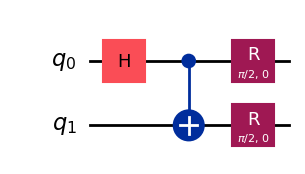

In [ ]:
# Create a Quantum Circuit acting on the q register
qc = QuantumCircuit(2)

# Hadamard Gate on qubit 1
qc.h(0)
qc.cx(0,1)# Control Not (control qubit , target qubit (to flip based on control qubit state))

#Vary phase of final pi/2 pulse
qc.append(RGate(theta=pi/2, phi=0), [0])
qc.append(RGate(theta=pi/2, phi=0), [1])

# Draw the circuit
qc.draw('mpl')

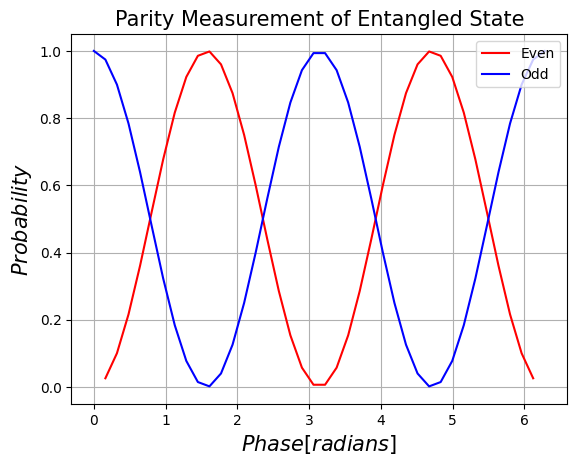

In [ ]:
phases = np.linspace( 0,2*pi, 40)
parity = []

for phase in phases:
  qc = QuantumCircuit(2)
  qc.h(0) # Hadamard on qubit 0
  qc.cx(0,1) #CNOT
  #Vary phase of final pi/2 pulse
  qc.append(RGate(theta=pi/2, phi=phase), [0])
  qc.append(RGate(theta=pi/2, phi=phase), [1])

  # Draw the circuit
  qc.draw('mpl')

  # Ask for the state vector of the circuit
  qc.save_statevector()
  result = QasmSim.run(qc).result()

  parity.append((result.get_counts()))

import matplotlib.pyplot as plt
import pandas as pd

fs = 15
df = pd.DataFrame(parity)
plt.figure(1)
ax = plt.gca()

plt.plot(phases,df['00']+df['11'],'-r') # Even parity basis states
plt.plot(phases,df['01']+df['10'],'-b') # Odd parity basis states

# plt.legend()
plt.title('Parity Measurement of Entangled State', fontsize=fs)
ax.set_ylabel(r'$Probability$', fontsize=fs);
ax.set_xlabel(r'$Phase [radians]$', fontsize=fs);
plt.ylim(-0.05, 1.05)
plt.grid()
plt.legend(['Even','Odd'],loc=1)


Parity oscillations of the full qubit register confirm that the two qubits are entangled.


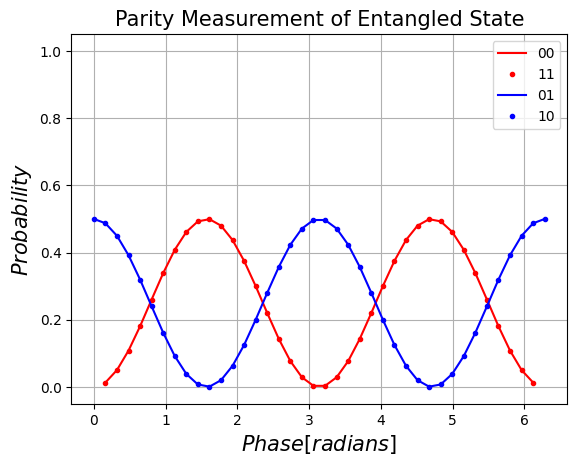

In [ ]:

fs = 15
df = pd.DataFrame(parity)
plt.figure(1)
ax = plt.gca()

plt.plot(phases,df['00'],'-r') # Even parity basis states
plt.plot(phases,df['11'],'.r') # Even parity basis states

plt.plot(phases,df['01'],'-b') # Odd parity basis states
plt.plot(phases,df['10'],'.b') # Odd parity basis states

# plt.legend()
plt.title('Parity Measurement of Entangled State', fontsize=fs)
ax.set_ylabel(r'$Probability$', fontsize=fs);
ax.set_xlabel(r'$Phase [radians]$', fontsize=fs);
plt.ylim(-0.05, 1.05)
plt.grid()
plt.legend(['00','11','01','10'],loc=1)


#Parity oscillations of NOT entangled qubits

But what if each qubit was NOT entangled?

What if they were just in a superposition?

What would the parity oscillations look like?

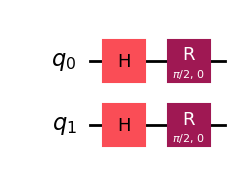

In [ ]:
# Create a Quantum Circuit acting on the q register
qc = QuantumCircuit(2)

# Hadamard Gate on qubit 0
qc.h(0)
# Hadamard Gate on qubit 1
qc.h(1)

#Vary phase of final pi/2 pulse
qc.append(RGate(theta=pi/2, phi=0), [0])
qc.append(RGate(theta=pi/2, phi=0), [1])

# Draw the circuit
qc.draw('mpl')

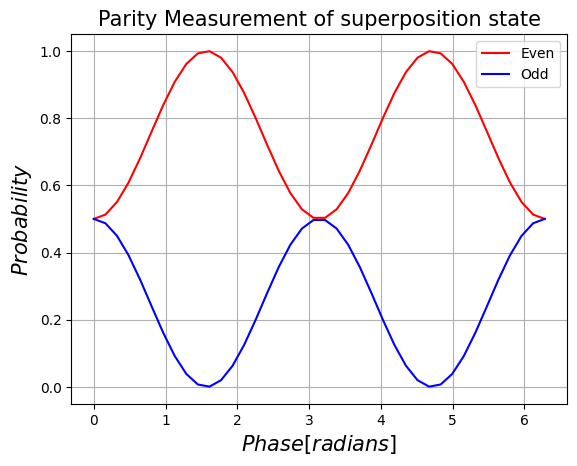

In [ ]:
phases = np.linspace( 0,2*pi, 40)
parity_superposition = []

for phase in phases:
  qc = QuantumCircuit(2)
  qc.h(0)
  qc.h(1)
  #Vary phase of final pi/2 pulse
  qc.append(RGate(theta=pi/2, phi=phase), [0])
  qc.append(RGate(theta=pi/2, phi=phase), [1])

  # Draw the circuit
  # qc.draw('mpl')

  # Ask for the state vector of the circuit
  qc.save_statevector()
  result = QasmSim.run(qc).result()

  parity_superposition.append((result.get_counts()))

import matplotlib.pyplot as plt
import pandas as pd

fs = 15
df = pd.DataFrame(parity_superposition)
plt.figure(1)
ax = plt.gca()

plt.plot(phases,df['00']+df['11'],'-r') # Even parity basis states
plt.plot(phases,df['01']+df['10'],'-b') # Odd parity basis states

# plt.legend()
plt.title('Parity Measurement of superposition state', fontsize=fs)
ax.set_ylabel(r'$Probability$', fontsize=fs);
ax.set_xlabel(r'$Phase [radians]$', fontsize=fs);
plt.ylim(-0.05, 1.05)
plt.grid()
plt.legend(['Even','Odd'],loc=1)


Now the contrast is not complete!

There is not a complete transfer from one Bell Basis to the other Bell Basis.

Let's further decompose the plot so we don't automatically add the 00 11 to the 'even states' and 01 10 to the 'odd'.

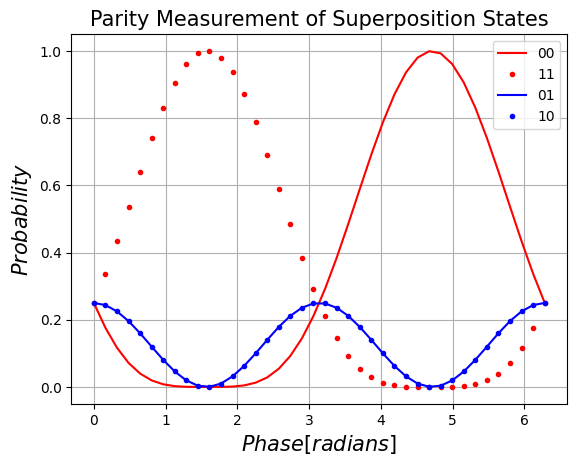

In [ ]:

fs = 15
df = pd.DataFrame(parity_superposition)
plt.figure(1)
ax = plt.gca()

plt.plot(phases,df['00'],'-r') # Even parity basis states
plt.plot(phases,df['11'],'.r') # Even parity basis states

plt.plot(phases,df['01'],'-b') # Odd parity basis states
plt.plot(phases,df['10'],'.b') # Odd parity basis states

# plt.legend()
plt.title('Parity Measurement of Superposition States', fontsize=fs)
ax.set_ylabel(r'$Probability$', fontsize=fs);
ax.set_xlabel(r'$Phase [radians]$', fontsize=fs);
plt.ylim(-0.05, 1.05)
plt.grid()
plt.legend(['00','11','01','10'],loc=1)


# |+⟩ states DON'T show Parity oscillations!

Interesting! The basis can't flip all the way. We can see that it tries, but instead of rotating to the 'odd' basis, there is still some 'even' basis left. That is because it is NOT in the even Bell Basis states to begin with. It is just in two |+⟩ states, which give equal probability of getting 0 and 1 for each qubit INDEPENDENTLY, not super-correlatedly as entangled states do.

#Parity oscillations with multiple qubits

What happens if you do this with more qubits?

Let's try three qubits.

How many parity oscillations would we expect for three qubits?

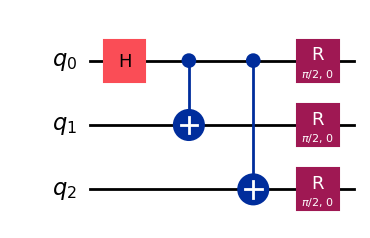

In [ ]:
# Create a Quantum Circuit acting on the q register
qc = QuantumCircuit(3)

# Hadamard Gate on qubit 1
qc.h(0)
qc.cx(0,1)# Control Not (control qubit , target qubit (to flip based on control qubit state))
qc.cx(0,2)# Control Not (control qubit , target qubit (to flip based on control qubit state))

#Vary phase of final pi/2 pulse
qc.append(RGate(theta=pi/2, phi=0), [0])
qc.append(RGate(theta=pi/2, phi=0), [1])
qc.append(RGate(theta=pi/2, phi=0), [2])

# Draw the circuit
qc.draw('mpl')

In [ ]:
phases = np.linspace( 0 ,2*pi, 60)
parity = []
phase = []
for phase in phases:
  qc = QuantumCircuit(3)
  qc.h(0) # Hadamard Gate on qubit 1
  qc.cx(0,1)# Control Not (control qubit , target qubit (to flip based on control qubit state))
  qc.cx(0,2)# Control Not (control qubit , target qubit (to flip based on control qubit state))

  #Vary phase of final pi/2 pulse
  qc.append(RGate(theta=pi/2, phi=phase), [0])
  qc.append(RGate(theta=pi/2, phi=phase), [1])
  qc.append(RGate(theta=pi/2, phi=phase), [2])

  # Ask for the state vector of the circuit
  qc.save_statevector()
  # qobj = assemble(qc)
  result = QasmSim.run(qc).result()
  parity.append((result.get_counts()))

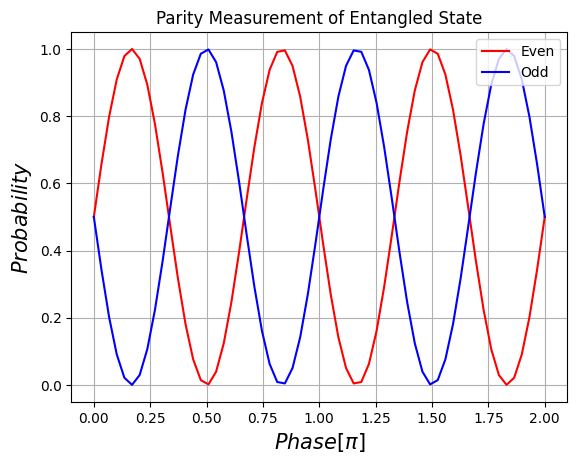

In [ ]:
df = pd.DataFrame(parity)
plt.figure(1)
ax = plt.gca()

plt.plot(phases/pi,df['000']+df['101']+df['011']+df['110'],'-r') # Even parity basis states
plt.plot(phases/pi,df['111']+df['001']+df['010']+df['100'],'-b') # Odd parity basis states

# plt.legend()
plt.title('Parity Measurement of Entangled State')
ax.set_ylabel(r'$Probability$', fontsize=fs)
ax.set_xlabel(r'$Phase [\pi]$', fontsize=fs)
plt.ylim(-0.05, 1.05)
plt.grid()
plt.legend(['Even','Odd'],loc=1)


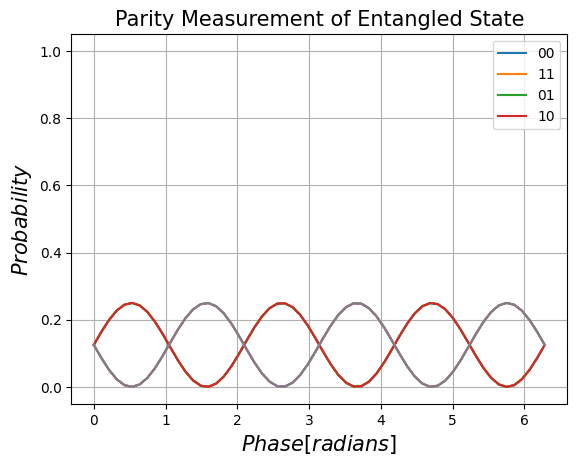

In [ ]:

fs = 15
df = pd.DataFrame(parity)
plt.figure(1)
ax = plt.gca()

plt.plot(phases,df['000'])
plt.plot(phases,df['101'])
plt.plot(phases,df['011'])
plt.plot(phases,df['110'])

plt.plot(phases,df['111'])
plt.plot(phases,df['001'])
plt.plot(phases,df['010'])
plt.plot(phases,df['100'])

# plt.legend()
plt.title('Parity Measurement of Entangled State', fontsize=fs)
ax.set_ylabel(r'$Probability$', fontsize=fs);
ax.set_xlabel(r'$Phase [radians]$', fontsize=fs);
plt.ylim(-0.05, 1.05)
plt.grid()
plt.legend(['00','11','01','10'],loc=1)


Three qubits, not entangled:

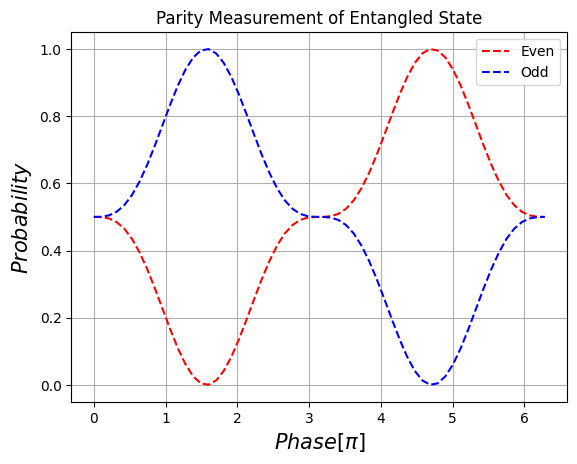

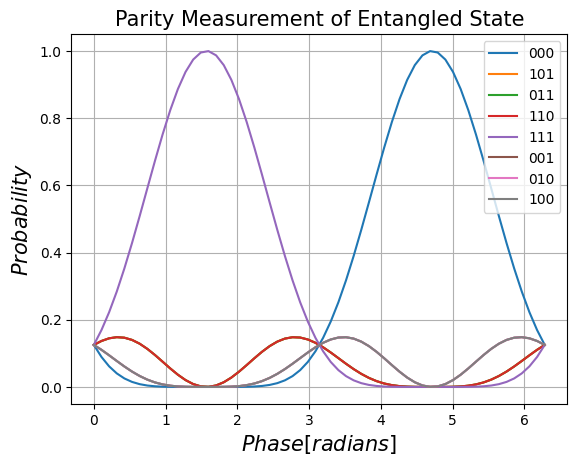

In [ ]:
phases = np.linspace( 0 ,2*pi, 60)
parity = []
phase = []
for phase in phases:
  qc = QuantumCircuit(3)
  qc.h(0) # Hadamard Gate on qubit 0
  qc.h(1)
  qc.h(2)

  #Vary phase of final pi/2 pulse
  qc.append(RGate(theta=pi/2, phi=phase), [0])
  qc.append(RGate(theta=pi/2, phi=phase), [1])
  qc.append(RGate(theta=pi/2, phi=phase), [2])

  # Ask for the state vector of the circuit
  qc.save_statevector()
  # qobj = assemble(qc)
  result = QasmSim.run(qc).result()
  parity.append((result.get_counts()))

df = pd.DataFrame(parity)
plt.figure(1)
ax = plt.gca()

plt.plot(phases,df['000']+df['101']+df['011']+df['110'],'--r') # Even parity basis states
plt.plot(phases,df['111']+df['001']+df['010']+df['100'],'--b') # Odd parity basis states

# plt.legend()
plt.title('Parity Measurement of Entangled State')
ax.set_ylabel(r'$Probability$', fontsize=fs)
ax.set_xlabel(r'$Phase [\pi]$', fontsize=fs)
plt.ylim(-0.05, 1.05)
plt.grid()
plt.legend(['Even','Odd'],loc=1)


fs = 15
df = pd.DataFrame(parity)
plt.figure(2)
ax = plt.gca()

plt.plot(phases,df['000'], label = '000')
plt.plot(phases,df['101'], label = '101')
plt.plot(phases,df['011'], label = '011')
plt.plot(phases,df['110'], label = '110')

plt.plot(phases,df['111'], label = '111')
plt.plot(phases,df['001'], label = '001')
plt.plot(phases,df['010'], label = '010')
plt.plot(phases,df['100'], label = '100')

# plt.legend()
plt.title('Parity Measurement of Entangled State', fontsize=fs)
ax.set_ylabel(r'$Probability$', fontsize=fs);
ax.set_xlabel(r'$Phase [radians]$', fontsize=fs);
plt.ylim(-0.05, 1.05)
plt.grid()
plt.legend(loc=1)


Parity oscillations not only don't include the correct states but also have the wrong period!

# Optical control of trapped ion qubits


To couple the electronic states of two trapped ion qubits we will need to apply laser pulses.

These laser pulses perturb the atomic state and we can calculate the rate of transitions using 'Perturbation theory'.

The lasers apply an electric field to the atom and perturb it towards the excited state.

For the spherical S ground state an applied electric field will polarize it relative to that applied field and shift it toward the orbital of an exicted P state which is a dipole (state (2,1,0) below).

![https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Hydrogen_Density_Plots.png/495px-Hydrogen_Density_Plots.png](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Hydrogen_Density_Plots.png/495px-Hydrogen_Density_Plots.png)

> https://en.wikipedia.org/wiki/Atomic_orbital Atomic orbitals of the electron in a hydrogen atom at different energy levels. The probability of finding the electron is given by the color, as shown in the key at upper right.

The P state decays rapidly back to the S ground state and the time it takes to decay down is directly related to the other direction S → P.
So we will use that decay rate to calculate the excitation rate.

However, instead of the S-P transition though we will discuss a more interesting long lived excited state the D state (such as state (3,2,0) above)

The D excited state is a quadrapole and is much more resilient to decay via vacuum perturbations. Instead of a life time of nanoseconds like the P-state, the D-state survives for over 300 milliseconds making it a much better qubit state since we'll have time to perform operations on the qubit before it decays and destroys our information.


How fast will we have a Rabi oscillation if we focus a 2 mW laser beam to a 100um diameter?

In [ ]:
#Power in the total laser beam
power = .002 # 2 milliWatt

beamdiameter=100e-6 # focus to 100um beam diameter

#Convert to Intensity
intensity = (power)*2/np.pi/(beamdiameter/2)/(beamdiameter/2)/100/100 #Watts/cm**2


In [ ]:
'''
Natural lifetime of D_3/2 = 357ms (before decay to S_1/2)
'''
A12 = 1/.357 #decay rate D5/2 = 1/357 ms

#Wavelength of resonant light is 674.025 nm
wavenumber = 2*np.pi /674.025e-9

#Constants of Nature
charge = constants.e #C
hbar = constants.Planck/2/np.pi #Js
c= constants.c #m/s
alpha = constants.alpha # The Fine Structure constant
Z0 = 376.73 #Impedance of free space (Ohms)


### Calculate the Rabi coupling rate from the Electric field strength

## $\Omega = \frac{e E}{\hbar} \sqrt{ \frac{A_{12} (\lambda/ 2 \pi) ^3}{2 c \alpha }} $

$E \equiv$ electric field

$e \equiv$ the charge of the electron [C]

$\hbar \equiv$  Plank's constant / 2 $\pi$

$A \equiv$ the decay rate [Hz]

$ \lambda \equiv$ wavelength

$ c \equiv$  speed of light

$\alpha \equiv$  Fine structure constant


In [ ]:
#Calculate the Electric field from that intensity of light
# The E field is what perturbs the states
Efield = (intensity * Z0 * 2)**.5*100 #N/C

#Calculate the Rabi coupling rate from the Electric field strength
RabiOmegaquad = (charge*Efield/hbar)*np.sqrt(A12 /(2*c*alpha*wavenumber**3))

angle_B = 90 *np.pi/180 # angle from B to k
angle_E = 90 *np.pi/180 # angle from e to (k-B plane)

#\Delta_m=2   - j(cos(angle_E) cos(angle_B) + i sin(angle_E)) sin(angle_B)j

#print((np.cos(angle_E)*np.cos(angle_B) + np.sin(angle_E))*np.sin(angle_B))
# for angle_E=90 simplifies to just sin(angle_B)

RabiOmegaquad = RabiOmegaquad*np.sin(angle_B)
pi_time = round(1*np.pi/RabiOmegaquad*1e6,2) # in microseconds

print("pi time [us]")
print(pi_time)

pi time [us]
3.75


Use this rate to plot a Rabi oscillation of a single qubit electronic state.

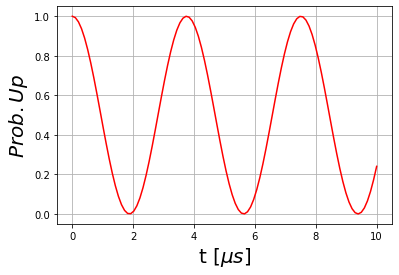

In [ ]:
#Define Hamiltonian
H = RabiOmegaquad * sigmay()

#Define the time to run the simulation
time_end = 10*1e-6 #Pulse 10us
times=np.linspace(0,time_end,100)

#Initial state
psi0 = basis(2,0)

# Run the 'Master Equation' Solver
result = mesolve(H, psi0, times, [], [])

#Plot
fig, axes = plt.subplots(1,1)

axes.plot(times*1e6, expect(sigmap()*sigmam(), result.states), '-r')

axes.set_xlabel(r't $[\mu s]$', fontsize=20)
axes.set_ylabel(r'$Prob. Up$', fontsize=20);
axes.grid()


Now we can use this coupling of a single spin qubit as one of the lasers in the two qubit gate (but at a slightly different frequency).

Again, the two qubit gate **requires** interaction of the two qubits via the harmonic oscillator levels.

The rate of the single qubit gate just sets the overall rate of the slower two qubit gate which must go through the trap frequency. If we keep increasing the power at some point the period of the single qubit period is comparable to the trap period and higher order excitations are possible, which means that the simple Hamiltonian we created isn't valid and we would need to add more possible states for excitations from the ground state.



# Exercises

 1. Run a two qubit circuit with a Hadamard gate on the first qubit and a CNOT on both qubits.

  1. What is the resulting state called?
  1. Is this final state entangled? How do you know?

 1. Check the parity oscillations of this final state from  state by applying a π/2 pulse to the final state but while rotating the axis of rotation (varying phase of applied pulse). This is similar to a Ramsey measurement where we want to orbit our applied rotation through the X and Y axes all the way around the Bloch sphere. Plot your results.

 1. Create a new quantum circuit with two qubits and apply a Hadamard gate to both qubits.
  1. What is the final state?
  1. Is it entangled?
  1. Show that you can construct this two qubit statevector from the tensor product of each state individually.
  > Use `qubitstate1.tensor(qubitstate2)` and compare to the `twoqubitstate`

  1.  Is it possible to construct the entangled state from problem #1 similarly? Why not?

 1. Check for entanglement fidelity by performing parity oscillations of the state created by just the Hadamard gates. Plot your results.
  1. What about the parity oscillation tells you if it is entangled or not?


## BONUS exercises as food for thought on the Midterm Project (not due as HW) :

 1. Try reducing the number of harmonic oscillator levels in the Molmer Sorenson simulation without introducing errors. Is it possible?

 1. How fast would the 2 qubit MS gate need to be to perform 10 CNOTs with only 1% error and with 10ms spin coherence times? ( Optional: What power laser beams would you need to make a 2Q gate this fast? )

 1. With this higher laser power, the detuning from the motional excitation must increase. What is the 'ideal detuning' calculated for this higher laser power? How big is it compared to the frequency of the confining ion trap? How does the ideal time of the 2Q gate compare to the period of the trap?

 > Once the detuning is similar to the trap frequency, many of our assumptions breakdown and the simulation no longer holds. Specifically other motional states (including higher order excitations) are occupied during the gate which are not included in our Hamiltonian or 7x7 Harmonic oscillator state space.

### Extra super bonus:
 1. What is the matrix representation of just a control phase gate, without Hadamard gates before and after?

 1. Show the rotation sequence of two qubits on Bloch spheres during a controlled phase gate for two initial cases: |00⟩ and |10⟩. Showing the Hadamard Gates as well. (Doesn't need to be animated)



In [ ]:
'''
Exercise 1
'''


'\nExercise 1\n'

In [ ]:
'''
Exercise 2
'''


'\nExercise 2\n'

In [ ]:
import numpy as np

# |0>
Zero = np.array([[1.],
                 [0.]])

np.kron(Zero, Zero)


array([[1.],
       [0.],
       [0.],
       [0.]])

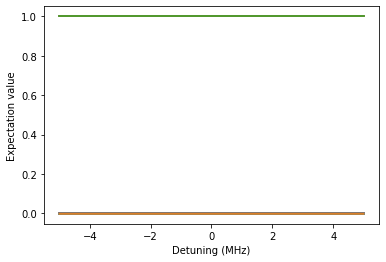

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
omega_rf = 2 * np.pi * 5e6  # Hz
B_ext = 2  # Gauss
pulse_power = 50e-3  # W
pulse_time = 10e-9  # s

# Define operators
sx = sigmax()
sy = sigmay()
sz = sigmaz()

# Define initial state
psi0 = basis(2, 0)  # initial state |0>

# Define detuning values to sweep over
detuning_values = np.linspace(-5e6, 5e6, 101)  # Hz

# Define function to compute expectation values
def compute_expectation_values(delta):
    # Compute Rabi frequency based on pulse power and detuning
    omega = pulse_power * omega_rf / (2 * np.pi * B_ext) * np.sqrt(1 + (delta / omega_rf) ** 2)

    # Define time-dependent Hamiltonian
    H = omega * (np.cos(delta * pulse_time) * sx + np.sin(delta * pulse_time) * sy)

    # Solve time-dependent Schrodinger equation
    result = mesolve(H, psi0, np.linspace(0, pulse_time, 101), [], [sx, sy, sz])

    # Return expectation values
    return result.expect

# Compute expectation values for each detuning value
expectations = np.array([compute_expectation_values(delta) for delta in detuning_values])

# Plot results
fig, ax = plt.subplots()
ax.plot(detuning_values / 1e6, expectations[:, 0], label=r'$\langle X \rangle$')
ax.plot(detuning_values / 1e6, expectations[:, 1], label=r'$\langle Y \rangle$')
ax.plot(detuning_values / 1e6, expectations[:, 2], label=r'$\langle Z \rangle$')
ax.set_xlabel('Detuning (MHz)')
ax.set_ylabel('Expectation value')
# ax.legend()
plt.show()


In [ ]:
from qutip import basis, fidelity
from qutip_qip.algorithms import qft_gate_sequence
from qutip_qip.device import LinearSpinChain
from qutip.ipynbtools import version_table
import qutip_qip

num_qubits = 10
# The QFT circuit
qc = qft_gate_sequence(num_qubits, swapping=False, to_cnot=True)
# Gate-level simulation
state1 = qc.run(basis([2] * num_qubits, [0] * num_qubits))
# Pulse-level simulation
processor = LinearSpinChain(num_qubits)
processor.load_circuit(qc)
state2 = processor.run_state(basis([2] * num_qubits,
                                   [0] * num_qubits)).states[-1]
fidelity(state1, state2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.9999546960616218

In [ ]:
import numpy as np
import qutip
from qutip_qip.circuit import QubitCircuit
from qutip_qip.device import SCQubits

qc = QubitCircuit(2)
qc.add_gate("RZ", 0, arg_value=np.pi)
qc.add_gate("RY", 1, arg_value=np.pi)
qc.add_gate("CNOT", targets=0, controls=1)

processor = SCQubits(2)
processor.load_circuit(qc)
init_state = qutip.basis([3, 3], [0, 0])
result = processor.run_state(init_state)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


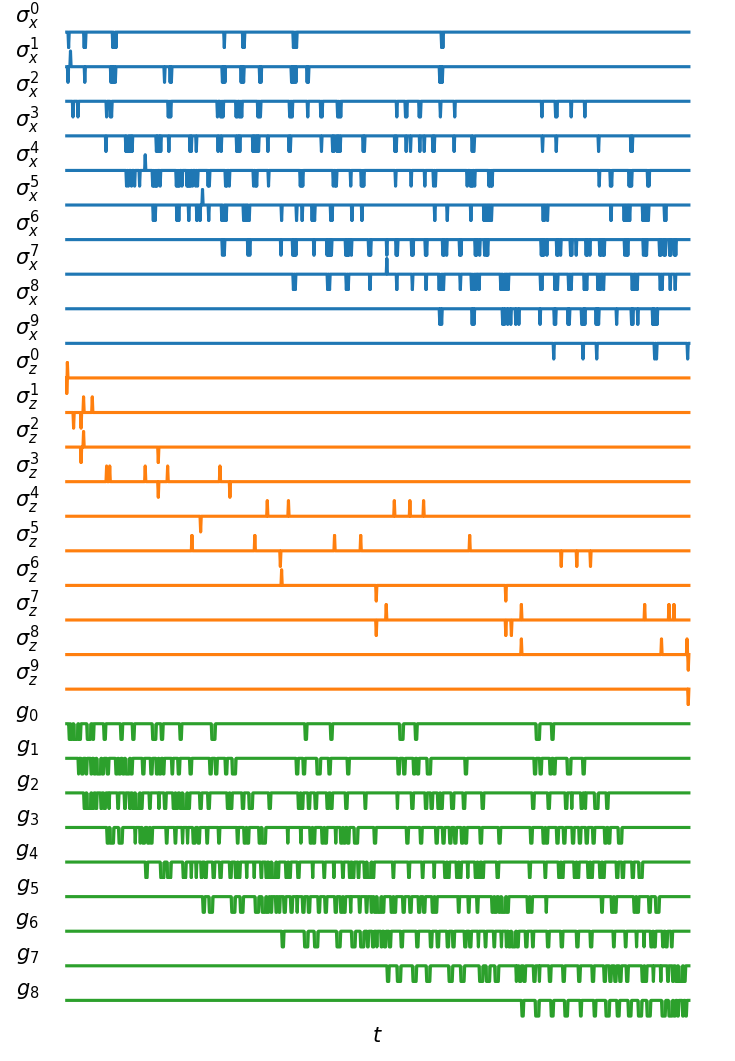

In [ ]:
def get_control_latex(model):
    """
    Get the labels for each Hamiltonian.
    It is used in the method method :meth:`.Processor.plot_pulses`.
    It is a 2-d nested list, in the plot,
    a different color will be used for each sublist.
    """
    num_qubits = model.num_qubits
    num_coupling = model._get_num_coupling()
    return [
        {f"sx{m}": r"$\sigma_x^{}$".format(m) for m in range(num_qubits)},
        {f"sz{m}": r"$\sigma_z^{}$".format(m) for m in range(num_qubits)},
        {f"g{m}": r"$g_{}$".format(m) for m in range(num_coupling)},
    ]


fig, axes = processor.plot_pulses(
    figsize=(5, 7), dpi=150, pulse_labels=get_control_latex(processor.model)
)
axes[-1].set_xlabel("$t$");